#  Exploring the Correlation of the Words and Phrases
---

This notebook explores the different correlations, specifically looking for common topics and interesting trends.  Multigrams are looked at to give better context to each of the terms.

In [12]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')

In [4]:
reddit_df= pd.read_csv('../data/reddit_df.csv')

In [5]:
X = reddit_df['full_text_clean']
y = reddit_df['subreddit']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=22)

### Looking at bi-grams

In [7]:
model_vec = make_pipeline(CountVectorizer(ngram_range=(2,2)), LogisticRegression())
model_vec.fit(X_train, y_train);

In [8]:
print(model_vec.score(X_train, y_train))
print(model_vec.score(X_test, y_test))

0.998997995991984
0.8867735470941884


In [9]:
coef1 = np.exp(model_vec.named_steps['logisticregression'].coef_)[0]

features = model_vec.named_steps['countvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef1))

In [10]:
coef_df = pd.DataFrame.from_dict(feat_dict, orient='index')
coef_df.columns = ['Coef']
coef_df.sort_values(by='Coef', ascending=False).head(20)

,Coef
american civil,1.901217
dark age,1.665394
militate great,1.590755
american revolution,1.565831
british rule,1.560213
south africa,1.546136
major difference,1.519608
come know,1.511781
start finish,1.489944
franz ferdinand,1.485305


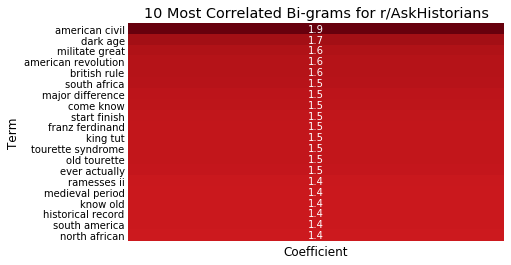

In [70]:
sns.heatmap(coef_df.sort_values(by='Coef', ascending=False).head(20), 
            cmap='Reds',
            vmin=0,
            annot=True,
            cbar=False,
            xticklabels=False
           )
plt.title('10 Most Correlated Bi-grams for r/AskHistorians')
plt.ylabel('Term')
plt.xlabel('Coefficient');

### Looking at 3-grams

In [15]:
model_3vec = make_pipeline(CountVectorizer(ngram_range=(3,3)), LogisticRegression())
model_3vec.fit(X_train, y_train);

In [16]:
print(model_3vec.score(X_train, y_train))
print(model_3vec.score(X_test, y_test))

0.998997995991984
0.8787575150300602


In [19]:
coef2 = np.exp(model_3vec.named_steps['logisticregression'].coef_)[0]

features2 = model_3vec.named_steps['countvectorizer'].get_feature_names()

feat_dict2 = dict(zip(features2, coef2))

In [20]:
coef2_df = pd.DataFrame.from_dict(feat_dict2, orient='index')
coef2_df.columns = ['Coef']
coef2_df.sort_values(by='Coef', ascending=False).head(20)

,Coef
american civil war,1.965574
canada get independece,1.560284
nudity become taboo,1.560284
militate great men,1.466995
germany militate great,1.466995
ferdinand targeted assassination,1.430582
ottoman empire affected,1.430582
existence xia dynasty,1.430582
forez become french,1.430582
franz ferdinand targeted,1.430582


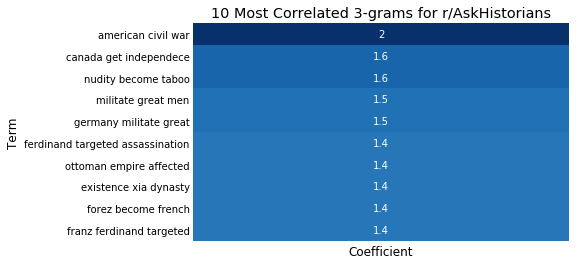

In [76]:
sns.heatmap(coef2_df.sort_values(by='Coef', ascending=False).head(10), 
            cmap='Blues',
            vmin=0,
            annot=True,
            cbar=False,
            xticklabels=False
           )
plt.title('10 Most Correlated 3-grams for r/AskHistorians')
plt.ylabel('Term')
plt.xlabel('Coefficient');

### Looking at 5-grams

In [24]:
model_5vec = make_pipeline(CountVectorizer(ngram_range=(5,5)), LogisticRegression())
model_5vec.fit(X_train, y_train);

In [25]:
print(model_5vec.score(X_train, y_train))
print(model_5vec.score(X_test, y_test))

0.9943219772879092
0.872745490981964


In [27]:
coef3 = np.exp(model_5vec.named_steps['logisticregression'].coef_)[0]

features3 = model_5vec.named_steps['countvectorizer'].get_feature_names()

feat_dict3 = dict(zip(features3, coef3))

In [29]:
coef3_df = pd.DataFrame.from_dict(feat_dict3, orient='index')
coef3_df.columns = ['Coef']
coef3_df.sort_values(by='Coef', ascending=False).head(20)

,Coef
napoleon bonaparte interested conquering europe,1.550185
hitler address fact aryan ideal,1.550185
movie theater become associated popcorn,1.550185
habitat chicken pork farm existed,1.550185
anyone know old tourette syndrome,1.550185
exactly operation ichi go successfull,1.550185
know woman embroidered bayeux tapestry,1.550185
romanian speak romance language albanian,1.550185
honest account american revolutionary war,1.550185
effect enlightenment view homosexuality europe,1.518333


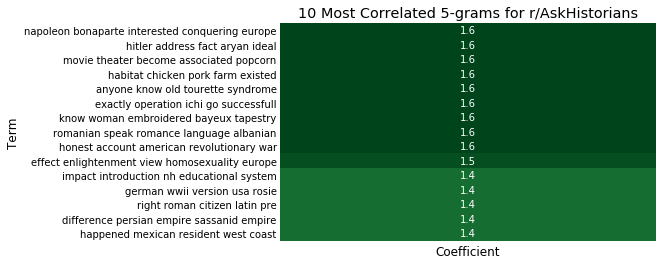

In [32]:
sns.heatmap(coef3_df.sort_values(by='Coef', ascending=False).head(15), 
            cmap='PRGn',
            vmin=0,
            annot=True,
            cbar=False,
            xticklabels=False
           )
plt.title('10 Most Correlated 5-grams for r/AskHistorians')
plt.ylabel('Term')
plt.xlabel('Coefficient');

### Looking at Tf-idf Correlations

I wanted to see why tf-idf did so poorly so I compared features.

**1-grams**

In [34]:
model_tfi = make_pipeline(TfidfVectorizer(ngram_range=(1,1)), LogisticRegression())
model_tfi.fit(X_train, y_train);

In [35]:
print(model_tfi.score(X_train, y_train))
print(model_tfi.score(X_test, y_test))

0.9509018036072144
0.8366733466933868


In [37]:
coef_tfi = np.exp(model_tfi.named_steps['logisticregression'].coef_)[0]

features_tfi = model_tfi.named_steps['tfidfvectorizer'].get_feature_names()

feat_dict_tfi = dict(zip(features_tfi, coef_tfi))

In [38]:
coef_df_tfi = pd.DataFrame.from_dict(feat_dict_tfi, orient='index')
coef_df_tfi.columns = ['Coef']
coef_df_tfi.sort_values(by='Coef', ascending=False).head(20)

,Coef
north,4.593789
use,3.812236
heard,3.521628
civil,3.145743
american,3.006687
woman,2.909038
practice,2.904070
source,2.851510
dark,2.558192
united,2.521401


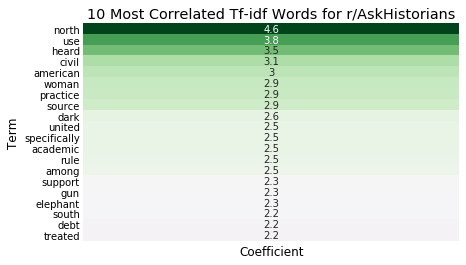

In [44]:
sns.heatmap(coef_df_tfi.sort_values(by='Coef', ascending=False).head(20), 
            cmap='PRGn',
            vmin=0,
            annot=True,
            cbar=False,
            xticklabels=False
           )
plt.title('10 Most Correlated Tf-idf Words for r/AskHistorians')
plt.ylabel('Term')
plt.xlabel('Coefficient');

**Bi-grams**

In [40]:
model2_tfi = make_pipeline(TfidfVectorizer(ngram_range=(2,2)), LogisticRegression())
model2_tfi.fit(X_train, y_train);

C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [41]:
print(model2_tfi.score(X_train, y_train))
print(model2_tfi.score(X_test, y_test))

0.9976619906479626
0.906813627254509


In [42]:
coef2_tfi = np.exp(model2_tfi.named_steps['logisticregression'].coef_)[0]

features2_tfi = model2_tfi.named_steps['tfidfvectorizer'].get_feature_names()

feat_dict2_tfi = dict(zip(features2_tfi, coef2_tfi))

In [43]:
coef2_df_tfi = pd.DataFrame.from_dict(feat_dict2_tfi, orient='index')
coef2_df_tfi.columns = ['Coef']
coef2_df_tfi.sort_values(by='Coef', ascending=False).head(20)

,Coef
american civil,2.381462
civil war,2.114173
american revolution,2.059882
dark age,2.009658
united state,1.981522
king tut,1.936805
20th century,1.820133
franz ferdinand,1.766647
south africa,1.741469
nazi germany,1.724817


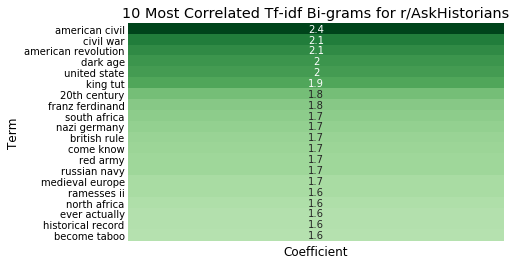

In [45]:
sns.heatmap(coef2_df_tfi.sort_values(by='Coef', ascending=False).head(20), 
            cmap='PRGn',
            vmin=0,
            annot=True,
            cbar=False,
            xticklabels=False
           )
plt.title('10 Most Correlated Tf-idf Bi-grams for r/AskHistorians')
plt.ylabel('Term')
plt.xlabel('Coefficient');

### Comparing Tf-idf and CountVec terms

Bi-grams that appear only in cvec.

In [62]:
set(coef_df.sort_values(by='Coef', ascending=False).head(20).index)-set(coef2_df_tfi.sort_values(by='Coef', ascending=False).head(20).index)

{'know old',
 'major difference',
 'medieval period',
 'militate great',
 'north african',
 'old tourette',
 'south america',
 'start finish',
 'tourette syndrome'}

Bi-grams that are only in tf-idf

In [64]:
set(coef2_df_tfi.sort_values(by='Coef', ascending=False).head(20).index)-set(coef_df.sort_values(by='Coef', ascending=False).head(20).index)

{'20th century',
 'become taboo',
 'civil war',
 'medieval europe',
 'nazi germany',
 'north africa',
 'red army',
 'russian navy',
 'united state'}

No immediate conclusions can really be drawn from these differences